# Basic Applications of NN
1. **MNIST Dataset**: Completed
2. **Fashion MNIST Dataset**: Completed
3. **IMDB Dataset**: Training is halted.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10, cifar100, imdb, reuters
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, ReLU, Softmax, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MeanSquaredError, BinaryCrossentropy, MeanAbsoluteError
from tensorflow.keras.metrics import SparseCategoricalAccuracy, MeanSquaredError, BinaryAccuracy, MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical, normalize, plot_model

In [4]:
import datetime
import pandas as pd

In [8]:
from tensorflow.keras.datasets import imdb

## MNIST

In [24]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# shape
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


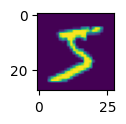

In [25]:
# get sense of the data

# first example
x_train[0, :, :]

# show first example
plt.figure(figsize=(1, 1))
plt.imshow(x_train[0, :, :])

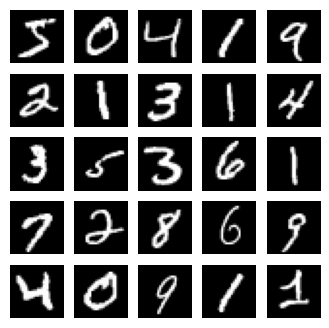

In [26]:
# plot data
plt.figure(figsize=(4, 4))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [27]:
# check labels
y_train[:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

In [28]:
# normalize data
x_train = normalize(x_train)
x_test = normalize(x_test)

# one-hot encode labels
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

# print labels for first 5 examples
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [29]:
# build model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [31]:
# tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [32]:
# train model
#model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=2, validation_freq=1, callbacks=[EarlyStopping(patience=1), ModelCheckpoint('model.h5', save_best_only=True), tensorboard_callback])

# batch size - no. of examples to process in one epoch
# epochs - no. of times to go through the data
# validation_data - data to validate on. The accuracy and loss on this data is printed after each epoch
# verbose - 0: no output, 1: progress bar, 2: one line per epoch
# validation_freq - how often to validate the model - after every n epochs
# callbacks - list of callbacks to apply during training
# EarlyStopping - stops training when a monitored metric has stopped improving  - patience: no. of epochs with no improvement after which training will be stopped
# ModelCheckpoint - saves the model after each epoch if the validation loss has improved - save_best_only: only save the best model
# tensorboard_callback - logs data for tensorboard - histogram_freq: how often to log histogram data

In [33]:
model.save('model.h5')

In [34]:
# evaluate model
(loss, accuracy) = model.evaluate(x_test, y_test)

# print
print('Loss:', loss)
print('Metrics:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.3038 - sparse_categorical_accuracy: 0.1174
Loss: 2.3037943840026855
Metrics: 0.11739999800920486


In [35]:
# tensorboard
# load_ext tensorboard
# tensorboard --logdir logs/fit
#%load_ext tensorboard

In [36]:
#%tensorboard --logdir logs/fit

## Fashion MNIST

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

In [77]:
# load data
(x_train_fm, y_train_fm), (x_test_fm, y_test_fm) = fashion_mnist.load_data()

# shape
print('x_train.shape:', x_train_fm.shape)
print('y_train.shape:', y_train_fm.shape)
print('x_test.shape:', x_test_fm.shape)
print('y_test.shape:', y_test_fm.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


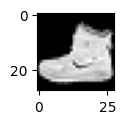

In [78]:
# get sense of the data

# first example
x_train_fm[0, :, :]
# show first example
plt.figure(figsize=(1, 1))
plt.imshow(x_train_fm[0, :, :], cmap='gray')

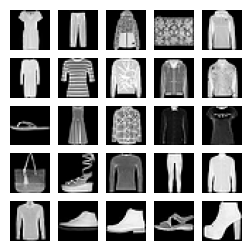

In [79]:
# show many examples
plt.figure(figsize=(3, 3))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train_fm[i+20], cmap='gray')
    plt.axis('off')

In [80]:
# show labels
y_train_fm[:25]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

In [81]:
# normalize data
x_train_fm = normalize(x_train_fm)
x_test_fm = normalize(x_test_fm)

In [82]:
# show label and description
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
df = pd.DataFrame({'label': y_train_fm[:10], 'description': [class_names[i] for i in y_train_fm[:10]]})
df

,label,description
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top
5,2,Pullover
6,7,Sneaker
7,2,Pullover
8,5,Sandal
9,5,Sandal


In [83]:
# build model
model_fm_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='leaky_relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# compile model
# NOTE: We're using SGD here. Stochastic Gradient Descent.
model_fm_1.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

In [84]:
model_fm_1.summary()  

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [85]:
# define callbacks
early_stopping = EarlyStopping(patience=2) # stop training if no improvement after 1 epoch. If there is a decrease in loss, it will wait for 1 more epoch to see if it improves, if not, it will stop
model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True) 
tensorboard_callback = TensorBoard(log_dir='logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [86]:
# train model
model_fm_1.fit(x_train_fm, y_train_fm, batch_size=32, epochs=10, validation_data=(x_test_fm, y_test_fm), validation_freq=1, callbacks=[early_stopping, model_checkpoint, tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9996 - sparse_categorical_accuracy: 0.6693 - val_loss: 0.5846 - val_sparse_categorical_accuracy: 0.7945
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5158 - sparse_categorical_accuracy: 0.8144 - val_loss: 0.4974 - val_sparse_categorical_accuracy: 0.8214
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4535 - sparse_categorical_accuracy: 0.8367 - val_loss: 0.4662 - val_sparse_categorical_accuracy: 0.8363
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4230 - sparse_categorical_accuracy: 0.8481 - val_loss: 0.4514 - val_sparse_categorical_accuracy: 0.8387
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4048 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.4285 - val_sparse_categorical_accuracy: 0.8441
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3896 - spars

In [87]:
# evaluate model
(loss, accuracy) = model_fm_1.evaluate(x_test_fm, y_test_fm)
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3907 - sparse_categorical_accuracy: 0.8574
Loss: 0.39071208238601685
Accuracy: 0.8574000000953674


In [88]:
model_fm_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='leaky_relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [90]:
model_fm_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [89]:
# let's use RMSprop
model_fm_2.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

# train model
model_fm_2.fit(x_train_fm, y_train_fm, batch_size=32, epochs=10, validation_data=(x_test_fm, y_test_fm), validation_freq=1, callbacks=[early_stopping, model_checkpoint, tensorboard_callback])

# evaluate model
(loss, accuracy) = model_fm_2.evaluate(x_test_fm, y_test_fm)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4974 - sparse_categorical_accuracy: 0.8201 - val_loss: 0.4192 - val_sparse_categorical_accuracy: 0.8475
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3678 - sparse_categorical_accuracy: 0.8656 - val_loss: 0.3834 - val_sparse_categorical_accuracy: 0.8603
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3311 - sparse_categorical_accuracy: 0.8774 - val_loss: 0.3706 - val_sparse_categorical_accuracy: 0.8650
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3095 - sparse_categorical_accuracy: 0.8844 - val_loss: 0.3709 - val_sparse_categorical_accuracy: 0.8633
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2911 - sparse_categorical_accuracy: 0.8900 - val_loss: 0.3613 - val_sparse_categorical_accuracy: 0.8679
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2752 - spars

In [93]:
# view tensorboard
#%load_ext tensorboard

#%tensorboard --logdir logs/fit

## IMDB

In [9]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow as tf

In [10]:
# load the dataset
(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = imdb.load_data(num_words=10000)

In [11]:
# shape
print('x_train.shape:', x_train_imdb.shape)
print('y_train.shape:', y_train_imdb.shape)
print('x_test.shape:', x_test_imdb.shape)
print('y_test.shape:', y_test_imdb.shape)

x_train.shape: (25000,)
y_train.shape: (25000,)
x_test.shape: (25000,)
y_test.shape: (25000,)


This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode the pad token.

In [12]:
x_train_imdb[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [13]:
y_train_imdb[0] # 1 is positive, 0 is negative sentiments

1

In [14]:
# get the len of the first 5 examples
[len(x) for x in x_train_imdb[:5]]

# we can see that the length of the reviews are different. we need to pad the reviews to make them the same length.
# we need the same length for all reviews so that we can feed them into the neural network model.
# nn expects fixed size input X.

[218, 189, 141, 550, 147]

In [15]:
# prepare data
# pad sequences
# pad sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of the sequence
x_train_imdb = tf.keras.preprocessing.sequence.pad_sequences(x_train_imdb, maxlen=256)
# this will truncate the sequence to 256 words if it is longer than that and add 0s to the beginning if it is shorter

In [16]:
# pad test data
x_test_imdb = tf.keras.preprocessing.sequence.pad_sequences(x_test_imdb, maxlen=256)

In [17]:
# now check the length of the first 5 examples
[len(x) for x in x_train_imdb[:5]]

# we have them in the same length now.

[256, 256, 256, 256, 256]

In [19]:
# build model

model_imdb = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=256),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_imdb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compile model
model_imdb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# fit and train model
model_imdb.fit(x_train_imdb, y_train_imdb, batch_size=32, epochs=5, validation_data=(x_test_imdb, y_test_imdb))

Epoch 1/5
458/782 [================>.............] - ETA: 12:50 - loss: 0.5098 - accuracy: 0.7465

: 

In [ ]:
# loss, accuracy
(loss, accuracy) = model_imdb.evaluate(x_test_imdb, y_test_imdb)
print('Loss:', loss)
print('Accuracy:', accuracy)

In [ ]:
# predict the sentiment of a review
# positive review
review1 = 'The movie was great. I loved it.'
# negative review
review2 = 'The movie was terrible. I hated it.'

# function to review sentiment
def predict_sentiment(review):
    # convert review to sequence
    review = review.lower().split()
    # imdb word index
    word_index = imdb.get_word_index()
    review = [word_index[word] for word in review if word in word_index]
    review = tf.keras.preprocessing.sequence.pad_sequences([review], maxlen=256)
    # predict sentiment
    prediction = model_imdb.predict(review)
    print(prediction)
    return prediction

In [ ]:
# predict sentiment
predict_sentiment(review1)
predict_sentiment(review2)

In [ ]:
# plot history
history = model_imdb.history.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

THE END